# Data Preprocessing

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# check the shape of data
df.shape

(303, 14)

In [4]:
# change column name for better identification
df = df.rename(columns={'cp': 'chest_pain',
                        'trestbps': 'systolic',
                        'chol': 'cholesterol',
                        'fbs': 'fasting_blood_sugar',
                        'restecg': 'restECG',
                        'thalach': 'max_heart_rate',
                        'exang': 'exercise_induced_angina',
                        'oldpeak': 'st_depression',
                        'ca': 'number_vessel',
                        'thal': 'thallium_stress',
                        'target': 'diagnose'
                       })

In [5]:
# give data type description for each column
type_desc = {'age': 'interval',
            'sex': 'nominal, binary',
            'chest_pain': 'ordinal',
            'systolic': 'interval',
            'cholesterol': 'interval',
            'fasting_blood_sugar': 'ordinal',
            'restECG': 'nominal',
            'max_heart_rate': 'interval',
            'exercise_induced_angina': 'nominal, binary',
            'st_depression': 'interval',
            'slope': 'ordinal',
            'number_vessel': 'interval',
            'thallium_stress': 'nominal',
            'diagnose': 'nominal, binary'}

# source https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/#ref86

In [6]:
# feature description
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        type_desc[i],
        df[i].isna().sum(),
        round((df[i].isna().sum())/len(df)*100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

df_desc = pd.DataFrame(desc, columns=['Feature', 'DataType', 'Measurement Scale', 'NaN', '%Nan', 'Unique', 'Sample'])
df_desc

# there is no missing value on the data
# all data have been in numerical format

,Feature,DataType,Measurement Scale,NaN,%Nan,Unique,Sample
0,age,int64,interval,0,0.0,41,"[40, 37]"
1,sex,int64,"nominal, binary",0,0.0,2,"[0, 1]"
2,chest_pain,int64,ordinal,0,0.0,4,"[2, 0]"
3,systolic,int64,interval,0,0.0,49,"[106, 144]"
4,cholesterol,int64,interval,0,0.0,152,"[319, 221]"
5,fasting_blood_sugar,int64,ordinal,0,0.0,2,"[1, 0]"
6,restECG,int64,nominal,0,0.0,3,"[0, 2]"
7,max_heart_rate,int64,interval,0,0.0,91,"[137, 177]"
8,exercise_induced_angina,int64,"nominal, binary",0,0.0,2,"[0, 1]"
9,st_depression,float64,interval,0,0.0,40,"[0.2, 3.4]"


In [7]:
# overview of the interval data
df[['age', 'systolic', 'cholesterol', 'max_heart_rate', 'st_depression', 'number_vessel']].describe()

,age,systolic,cholesterol,max_heart_rate,st_depression,number_vessel
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


## Outliers

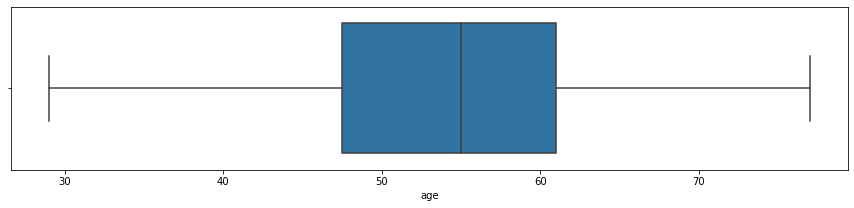

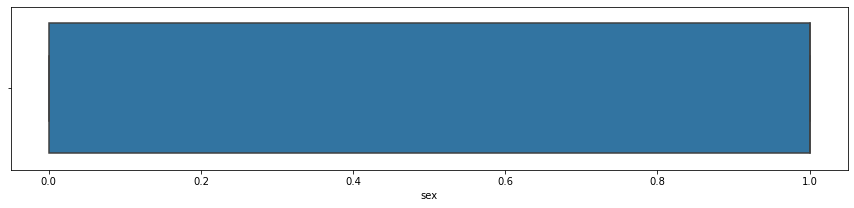

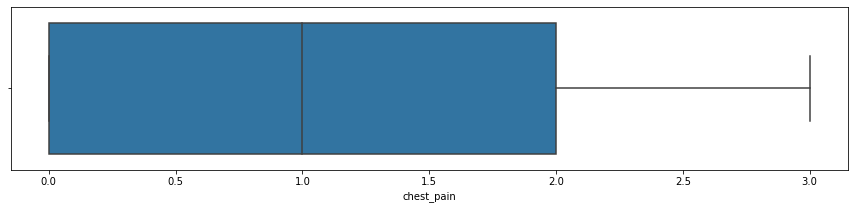

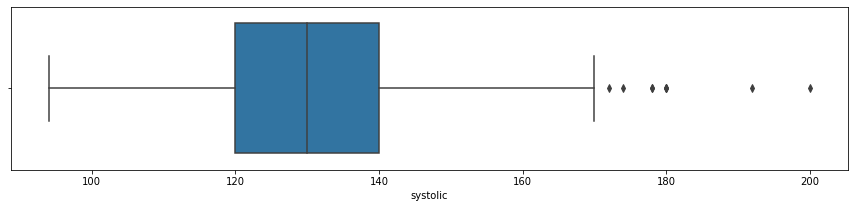

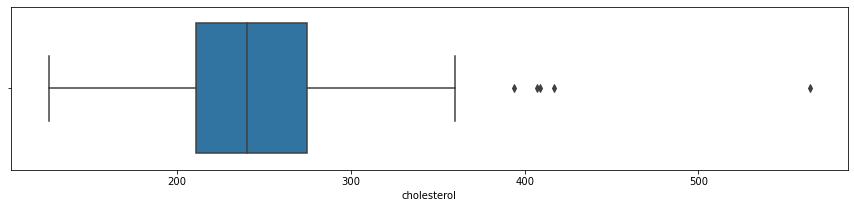

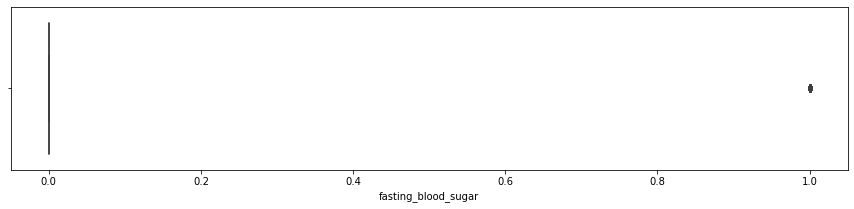

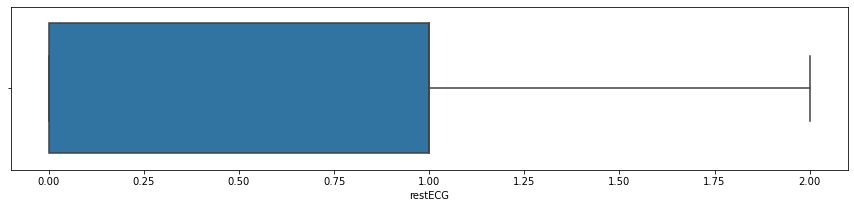

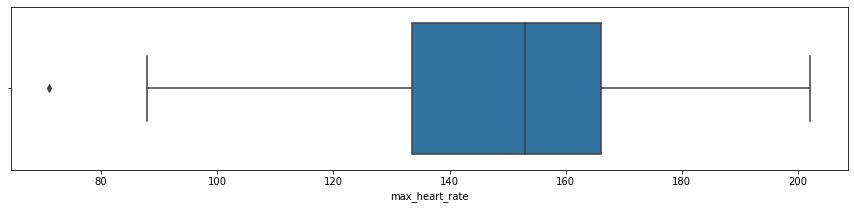

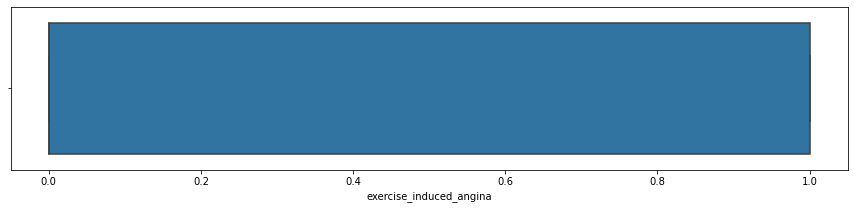

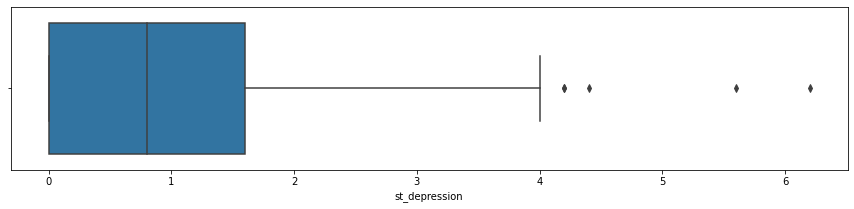

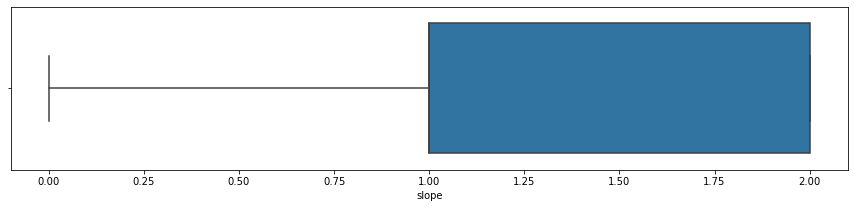

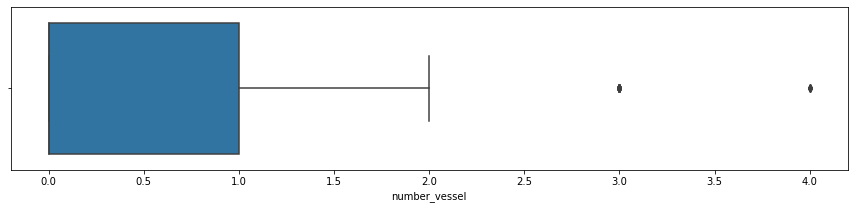

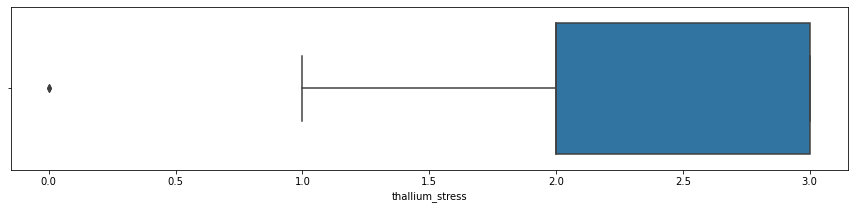

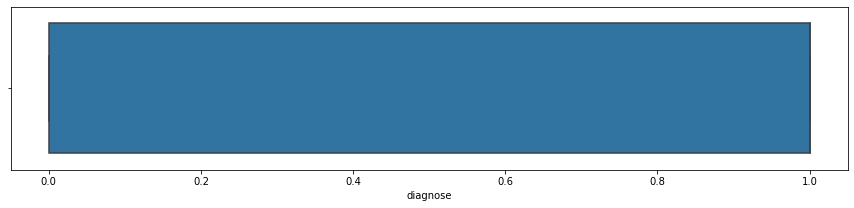

In [8]:
for i in range(1, len(df.columns)+1):
    plt.figure(figsize=(15,3))
    sns.boxplot(df[df.columns[i-1]])
    plt.show()

from boxplots, outliers present in feature:
- sistolic
- cholesterol 
- max_heart_rate 
- st_depression
- number_vessel
- thallium_scintigraphy

**systolic, cholesterol, max_heart_rate, st_depression**
- those features are interval data, where the value can be anything
- systolic possible range is 90mmHg - 220mmHg, so the outliers is still in the human range (heart.org)
- cholesterol possible range is 120mg/dL - 600mg/dL, so the outliers is still in the human range (healthline.com, cnn.com)
- heart rate possible range is 40bpm - 250bpm, so the outliers is tolerable (nhsinform.scot)
- st_depression is the slope of ST Segments, it can be any positive number (www.ncbi.nlm.nih.gov/pmc/articles/PMC3760535/)

**number_vessel**
- According to data description the range of number of major vessel should range from 0-3. But, in the box plot, there is an outlier located on value of 4. Then, we need to fix this value first.

**thallium_stress**
- According to the data description, the value of thal should be 3, 6, or 7. But, the boxplot shows the value 0-4. We need to check what happens to these data

In [9]:
# fixing number_vessel value

print(len(df[df['number_vessel']==4]))
# there are 5 data that has number_vesel value of 4

# number vessel description: number of major vessels colored by fluoroscopy
# according to https://med.libretexts.org/, actually there are 5 major vessels in human heart
# therefore, having number_vesel value of 0,1,2,3,4 (in total: 5), is actually possible
# but, if we consider the observation sample to have number_vessel range from 0-3, we need to drop the outliers

# dropping outliers
df = df[df['number_vessel'] != 4]

5


In [10]:
# fixing thallium_stress
print(df['thallium_stress'].unique())

# according to www.healthline.com, thallium stress is a test to find the response of heart due to external induces stress
# there are 3 types of thallium test result, which has been mentioned on the description
# however, the data shows there are 4 nominal category of this test result
# although the data is nominal, in this case, we assume that 0-value in the thallium_stress is a null value 

# drop the 0 data
df = df[df['thallium_stress']!=0]

[1 2 3 0]


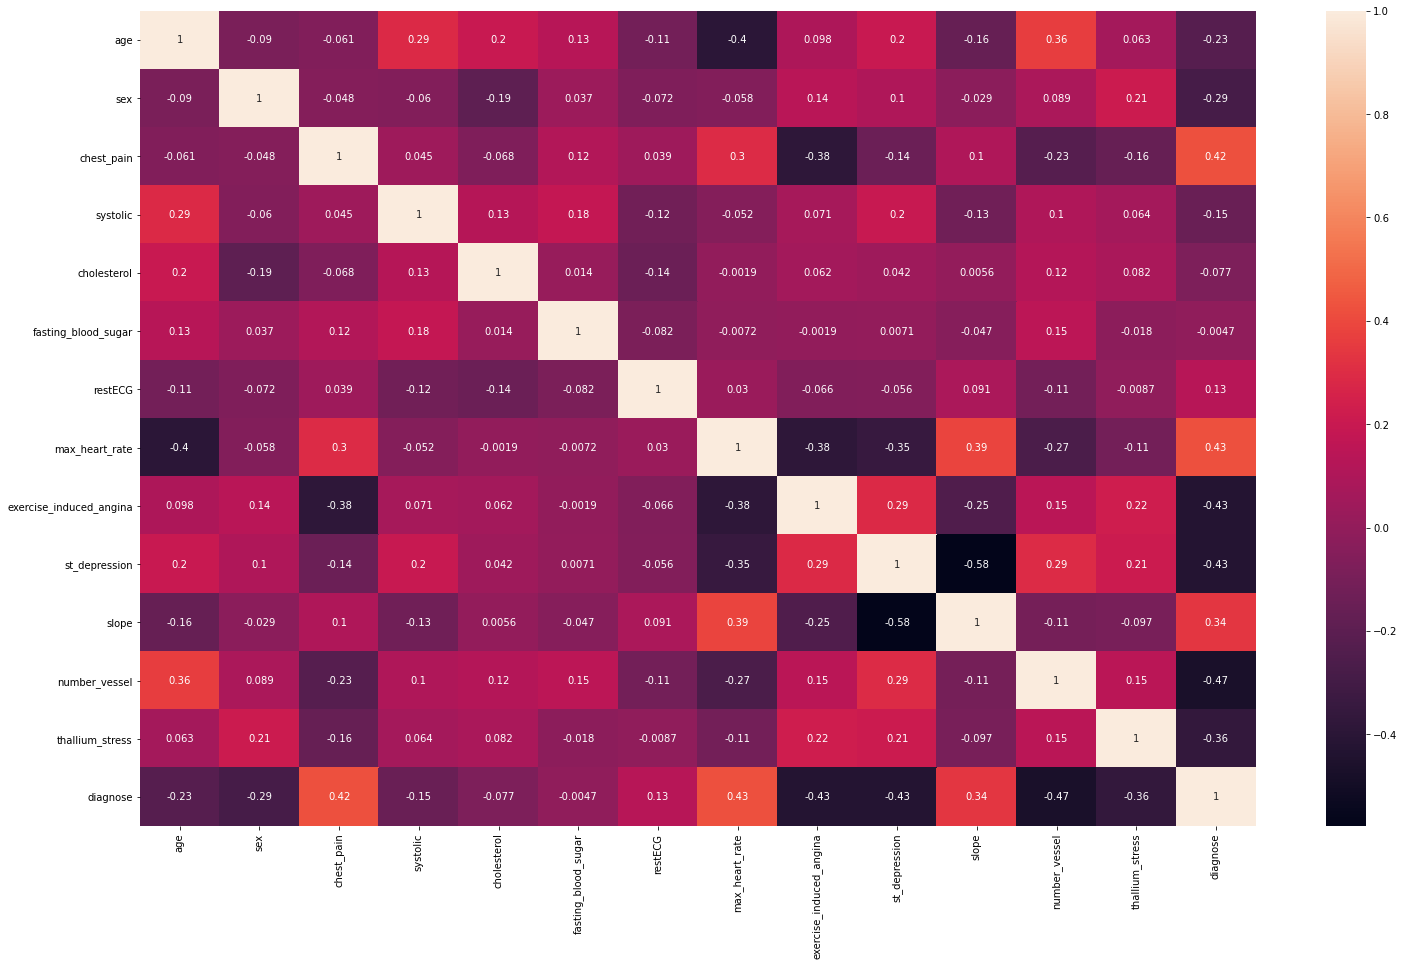

In [11]:
# see correlation number between features
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
# export processed data to csv for machine learning
df.to_csv (r'heart_clean.csv', index = False, header=True)

# Exploratory Data Analysis

The target column is the diagnose of heart disease (1: heart disease diagnose, 0: no heart disease diagnose)

## Age and Diagnose

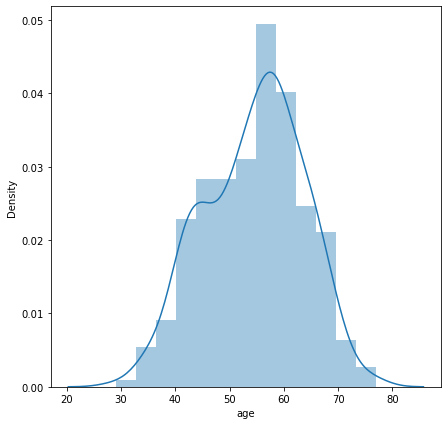

In [13]:
# see age distribution
plt.figure(figsize=(7,7))
sns.distplot(df['age'])
plt.show()

# the majority of tested patients age is range from 40-70 years

In [14]:
# recategorize age data

# print(df.age.min())
# print(df.age.max())
# minimum age is 29 and maximum age is 77

age_bin = [20, 40, 60, 80]
label = ['young adult', 'middle-age', 'elder']
df['age_cat'] = pd.cut(df['age'], bins = age_bin, labels = label)
df.head()

,age,sex,chest_pain,systolic,cholesterol,fasting_blood_sugar,restECG,max_heart_rate,exercise_induced_angina,st_depression,slope,number_vessel,thallium_stress,diagnose,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,elder
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,young adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-age


<AxesSubplot:xlabel='age_cat', ylabel='count'>

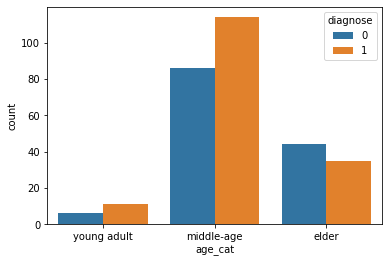

In [15]:
# see age class that likely to have heart disease
sns.countplot(x=df['age_cat'], hue=df['diagnose'])

# in young adult and middle-age class, there is more people with heart disease 
# people with age range from 40-60 seems more likely to have heart disease.
# but, if it is compared to the age distribution data, it is reasonable because the major population of data is ranging frmo 40 to 70
# therefore, we need to see the percentage of heart disease diagnose per class

In [16]:
# age percentage
pd.crosstab(df['age_cat'],df['diagnose'], normalize='index').round(4)*100

# according to the percentage, young-adult is more likely to carry heart disease
# this means, we have negative correlation of age and heart disease diagnosis

diagnose,0,1
age_cat,,
young adult,35.29,64.71
middle-age,43.00,57.00
elder,55.70,44.30


## Sex and Diagnosis

In [17]:
# binning sex data
df['sex'] = df['sex'].map({0:'Female', 1:'Male'})
df.head()

,age,sex,chest_pain,systolic,cholesterol,fasting_blood_sugar,restECG,max_heart_rate,exercise_induced_angina,st_depression,slope,number_vessel,thallium_stress,diagnose,age_cat
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,elder
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,young adult
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-age
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-age


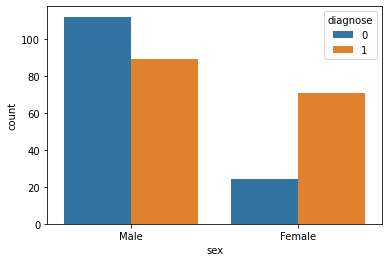

In [18]:
# see age class that likely to have heart disease
sns.countplot(x=df['sex'], hue=df['diagnose'])
plt.show()

# women are likely to have heart disease

In [19]:
# sex percentage
pd.crosstab(df['sex'],df['diagnose'], normalize='index').round(4)*100

# according to the crosstab displayed below, female patients is more likely to have heart disease patients

diagnose,0,1
sex,,
Female,25.26,74.74
Male,55.72,44.28


## Chest Pain and Diagnose

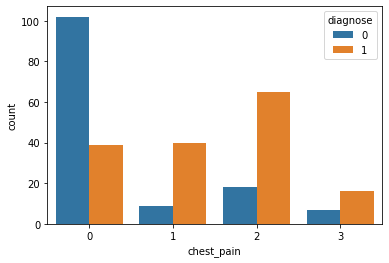

In [20]:
# see age class that likely to have heart disease
sns.countplot(x=df['chest_pain'], hue=df['diagnose'])
plt.show()

# most people with heart disease will experience level 2 chest pain

In [21]:
# chest pain percentage
pd.crosstab(df['chest_pain'],df['diagnose'], normalize='index').round(4)*100

# according to the percentage, people with heart disease diagnose is likely to feel chest pain
# this means, we have negative correlation of chest pain and heart disease diagnosis

diagnose,0,1
chest_pain,,
0,72.34,27.66
1,18.37,81.63
2,21.69,78.31
3,30.43,69.57


## Systolic and Diagnose

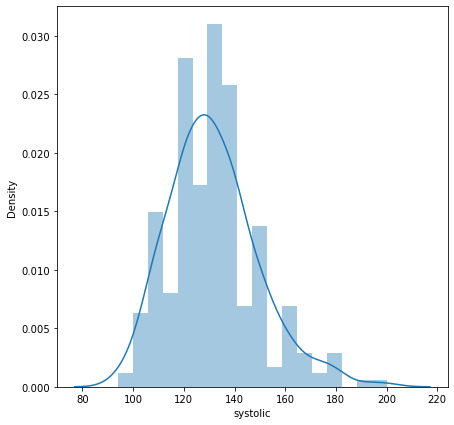

In [22]:
# see the distribution of the data
plt.figure(figsize=(7,7))
sns.distplot(df['systolic'])
plt.show()

# the distribution is nearly normal

In [23]:
# recategorize age data

# print(df.systolic.min())
# print(df.systolic.max())
# minimum systolic pressure is 94 and maximum is 200

sys_bin = [80, 120, 130, 140, 180, 220] # source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
label = ['normal', 'elevated', 'high', 'hypertension', 'hypertensive critical']
df['sys_cat'] = pd.cut(df['systolic'], bins = sys_bin, labels = label)
df.head()

,age,sex,chest_pain,systolic,cholesterol,fasting_blood_sugar,restECG,max_heart_rate,exercise_induced_angina,st_depression,slope,number_vessel,thallium_stress,diagnose,age_cat,sys_cat
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,elder,hypertension
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,young adult,elevated
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age,elevated
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-age,normal
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-age,normal


In [24]:
# systolic percentage
pd.crosstab(df['sys_cat'],df['diagnose'], normalize='index').round(4)*100

# more people with normal blood pressure has more probability of having heart disease

diagnose,0,1
sys_cat,,
normal,38.14,61.86
elevated,46.48,53.52
high,44.44,55.56
hypertension,57.14,42.86
hypertensive critical,100.00,0.00


## Cholesterol and Diagnose

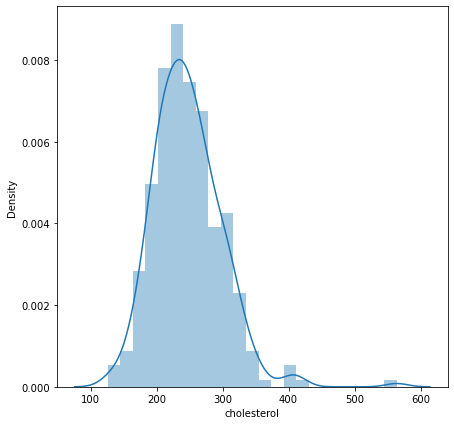

In [25]:
# see the distribution of the data
plt.figure(figsize=(7,7))
sns.distplot(df['cholesterol'])
plt.show()

# the distribution is nearly normal

In [26]:
# recategorize age data

# print(df.cholesterol.min())
# print(df.cholesterol.max())
# minimum age is 29 and maximum age is 77

cho_bin = [0, 200, 240, 600]
# source: https://www.medicalnewstoday.com/articles/315900#recommended-levels
label = ['normal', 'borderline', 'high']
df['cho_cat'] = pd.cut(df['cholesterol'], bins = cho_bin, labels = label)
df.head()

,age,sex,chest_pain,systolic,cholesterol,fasting_blood_sugar,restECG,max_heart_rate,exercise_induced_angina,st_depression,slope,number_vessel,thallium_stress,diagnose,age_cat,sys_cat,cho_cat
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,elder,hypertension,borderline
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,young adult,elevated,high
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age,elevated,borderline
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-age,normal,borderline
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-age,normal,high


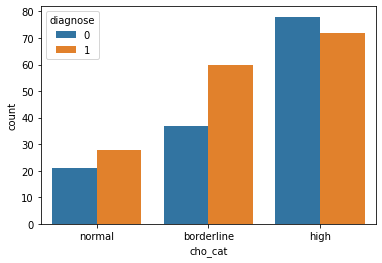

In [27]:
# see cholesterol class that likely to have heart disease
sns.countplot(x=df['cho_cat'], hue=df['diagnose'])
plt.show()

In [28]:
# cholesterol percentage
pd.crosstab(df['cho_cat'],df['diagnose'], normalize='index').round(4)*100

# cholesterol does not have much correlation to heart disease diagnosis

diagnose,0,1
cho_cat,,
normal,42.86,57.14
borderline,38.14,61.86
high,52.00,48.00


## Fasting Blood Sugar and Diagnose

In [30]:
# fasting blood sugar percentage
pd.crosstab(df['fasting_blood_sugar'],df['diagnose'], normalize='index').round(4)*100

# generally, fasting blood_sugar is not really correlated to the diagnose

diagnose,0,1
fasting_blood_sugar,,
0,45.85,54.15
1,46.51,53.49


## RestECG and Diagnose

restECG category description:
- 0: normal
- 1: having ST-T wave abnormality
- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [31]:
# restECG percentage
pd.crosstab(df['restECG'],df['diagnose'], normalize='index').round(4)*100

# people who have ST-T wave abnormality has higher probability of having heart disease

diagnose,0,1
restECG,,
0,53.79,46.21
1,37.41,62.59
2,75.00,25.00


## Maximum heart rate and diagnose

note:
- maximum heart rate is highly correlated with age
- general formula for maximum heart rate is 220-age

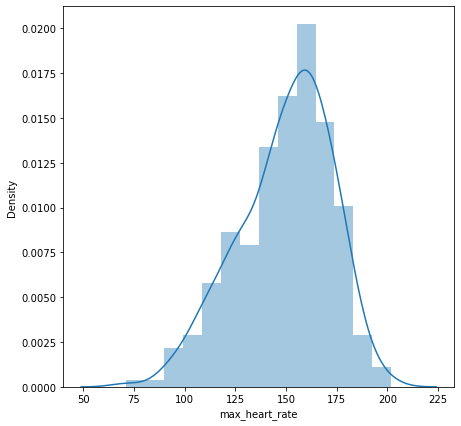

In [32]:
# see the distribution of the data
plt.figure(figsize=(7,7))
sns.distplot(df['max_heart_rate'])
plt.show()

# the distribution is nearly normal

In [33]:
# recategorize age data

# print(df.max_heart_rate.min())
# print(df.max_heart_rate.max())
# minimum heart rate  is 71 and maximum is 202

mhr_bin = [60, 100, 210]
label = ['normal', 'fast']
df['mhr_cat'] = pd.cut(df['max_heart_rate'], bins = mhr_bin, labels = label)
df.head()

,age,sex,chest_pain,systolic,cholesterol,fasting_blood_sugar,restECG,max_heart_rate,exercise_induced_angina,st_depression,slope,number_vessel,thallium_stress,diagnose,age_cat,sys_cat,cho_cat,mhr_cat
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1,elder,hypertension,borderline,fast
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1,young adult,elevated,high,fast
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age,elevated,borderline,fast
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-age,normal,borderline,fast
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-age,normal,high,fast


In [34]:
# restECG percentage
pd.crosstab(df['mhr_cat'],df['diagnose'], normalize='index').round(4)*100

# people who have fast heart rate tends to have heart disease

diagnose,0,1
mhr_cat,,
normal,87.50,12.50
fast,44.79,55.21


## Thallium stress and diagnose

thallium_stress category description:
- 1: fixed defect
- 2: normal
- 3: reversible defect

In [35]:
# thallium_stress percentage
pd.crosstab(df['thallium_stress'],df['diagnose'], normalize='index').round(4)*100

# people with normal blood flow can suffer heart disease

diagnose,0,1
thallium_stress,,
1,66.67,33.33
2,22.09,77.91
3,76.52,23.48
